<a href="https://colab.research.google.com/github/xavierjacomep/marketing-basado-en-datos/blob/main/lead-scoring/Marketing_basado_en_datos_Caso_Lead_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conversi√≥n de clientes de stuffmart.com
## Caso pr√°ctico sobre Clasificaci√≥n de Leads
---

**Asignatura:** Marketing basado en datos

**Autor:** Xavier J√°come Pi√±eiros, MSc.

---

## Contexto

La **Clasificaci√≥n de Leads** es una t√©cnica clave en el marketing digital y las ventas modernas, que permite identificar autom√°ticamente cu√°les clientes potenciales tienen mayor probabilidad de convertirse en clientes reales. Esta capacidad predictiva es fundamental para optimizar recursos, priorizar esfuerzos comerciales y dise√±ar estrategias m√°s efectivas.

En lugar de distribuir recursos uniformemente entre todos los leads, las empresas pueden enfocar sus acciones en aquellos que presentan mayor probabilidad de conversi√≥n, incrementando as√≠ el retorno de inversi√≥n (ROI) y mejorando las tasas de cierre de ventas.


---

## Planteamiento del Problema

**Stuffmart.com** es una empresa emergente de e-commerce que comercializa productos electr√≥nicos, hogar y estilo de vida a trav√©s de canales 100% digitales. Con presencia en mercados como Pakist√°n, India y Bangladesh, su equipo de marketing enfrenta el desaf√≠o de mejorar la conversi√≥n de leads generados a trav√©s de campa√±as digitales y redes sociales.

Actualmente, su tasa de conversi√≥n promedio es inferior al 5%, lo que representa un bajo retorno frente a su inversi√≥n publicitaria. La compa√±√≠a cuenta con un CRM que registra interacciones, fuentes de tr√°fico, comportamiento en el sitio web, edad, ubicaci√≥n y otros atributos de los leads.

El equipo ha decidido usar ciencia de datos para implementar un modelo predictivo que identifique a los leads con mayor probabilidad de convertirse en clientes, con el fin de enfocar los esfuerzos comerciales de forma m√°s eficiente.

Tu rol es el de Cient√≠fico de Datos. La alta direcci√≥n te ha encomendado desarrollar una soluci√≥n de anal√≠tica avanzada que permita mejorar la tasa de conversi√≥n y optimizar los costos de adquisici√≥n de clientes.

El objetivo principal es **construir un modelo de clasificaci√≥n supervisado** que permita predecir si un lead se convertir√° o no en cliente, a partir de un conjunto de variables relacionadas con su comportamiento, perfil demogr√°fico, canal de adquisici√≥n, interacci√≥n digital y estado actual.

Esto permitir√°:
- Priorizar leads con mayor probabilidad de conversi√≥n.
- Reducir el costo por adquisici√≥n de cliente.
- Personalizar estrategias de seguimiento y comunicaci√≥n seg√∫n el perfil del lead.
- Mejorar la eficiencia y efectividad del equipo comercial.

---

## Contenido del Dataset

El conjunto de datos incluye informaci√≥n detallada sobre leads, su comportamiento e interacci√≥n con el sitio web, y el resultado final en t√©rminos de conversi√≥n. Las variables est√°n agrupadas de la siguiente manera:

### üë§ Perfil del Lead
- `LeadID`: Identificador √∫nico del lead.
- `Age`: Edad del lead (en a√±os).
- `Gender`: G√©nero del lead.
- `Location`: Ciudad principal desde donde se origina el lead.

### üö™ Origen y Canal de Captaci√≥n
- `LeadSource`: Canal por el que se adquiri√≥ el lead (e.g., Social Media, Email, Referral).
- `ReferralSource`: Fuente de referencia espec√≠fica (e.g., Facebook, Google, Twitter).

### üíª Comportamiento en el Sitio Web
- `TimeSpent`: Tiempo total en minutos que el lead ha pasado en el sitio web.
- `PagesViewed`: Cantidad de p√°ginas web visitadas.
- `FormSubmissions`: N√∫mero de formularios completados.
- `Downloads`: N√∫mero de descargas realizadas (e.g., brochures, e-books).
- `CTR_ProductPage`: Click-through rate en p√°ginas de productos o servicios.

### üì¨ Comunicaci√≥n y Seguimiento
- `EmailSent`: N√∫mero de correos enviados al lead.
- `FollowUpEmails`: Correos de seguimiento enviados.
- `ResponseTime`: Tiempo de respuesta (en horas).
- `LeadStatus`: Estado actual del lead (e.g., Cold, Warm, Hot).

### üì± Tecnolog√≠a y Redes Sociales
- `DeviceType`: Tipo de dispositivo usado para acceder al sitio (e.g., Mobile, Desktop).
- `SocialMediaEngagement`: Nivel de interacci√≥n en redes sociales (e.g., likes, comentarios, shares).

### üí≥ Historial de Pago
- `PaymentHistory`: Estado del historial de pago del lead (e.g., Good, No Payment).

---

## Variable Objetivo

`Conversion`: Variable binaria que indica si el lead se convirti√≥ en cliente (`1`) o no (`0`).
Esta variable ser√° utilizada como variable objetivo para entrenar y evaluar modelos de clasificaci√≥n supervisados.

---



### 1. Carga y comprensi√≥n del dataset
- Importaci√≥n de librer√≠as necesarias.
- Definici√≥n de funciones para pruebas de hip√≥tesis y validaci√≥n de modelos
- Carga del dataset original en formato `.csv`.
- Exploraci√≥n inicial de los datos para conocer su estructura y contenido.
---

In [1]:
# ===========================================
# LIBRER√çAS Y CONFIGURACI√ìN
# ===========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif

!pip install feature_engine
from feature_engine.creation import MathFeatures
from feature_engine.discretisation import EqualFrequencyDiscretiser
from scipy.stats import chi2_contingency, kruskal

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

#### Definici√≥n de funciones reutilizables

In [2]:
# ===========================================
# FUNCIONES REUTILIZABLES PARA CLASE
# ===========================================

def pruebas_hipotesis_features(df, target, cat_vars, num_vars, alpha=0.05):
    print("Chi-cuadrado para variables categ√≥ricas:")
    for col in cat_vars:
        if df[col].isnull().sum() == 0:
            tabla = pd.crosstab(df[col], df[target])
            chi2, p, _, _ = chi2_contingency(tabla)
            print(f"{col}: p = {p:.4e} {'-> Asociaci√≥n significativa' if p < alpha else ''}")

    print("\nKruskal-Wallis para variables num√©ricas:")
    for col in num_vars:
        if df[col].isnull().sum() == 0:
            grupos = [df[df[target] == v][col] for v in sorted(df[target].unique())]
            _, p = kruskal(*grupos)
            print(f"{col}: p = {p:.4e} {'-> Diferencias significativas' if p < alpha else ''}")

def comparar_modelos(X_train, y_train, X_test, y_test):
    modelos = {
        'Logistic Regression': LogisticRegression(max_iter=1000, n_jobs=-1),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)
    }

    resultados = {}
    for nombre, modelo in modelos.items():
        modelo.fit(X_train, y_train)
        pred = modelo.predict(X_test)
        acc = accuracy_score(y_test, pred)
        f1 = f1_score(y_test, pred)
        resultados[nombre] = {'accuracy': acc, 'f1': f1}
        print(f"{nombre}: Accuracy={acc:.4f}, F1={f1:.4f}")

    resultados_df = pd.DataFrame(resultados).T.reset_index().rename(columns={'index': 'Modelo'})
    sns.barplot(data=resultados_df.melt(id_vars='Modelo'), x='Modelo', y='value', hue='variable')
    plt.title('Comparaci√≥n de Modelos')
    plt.ylabel('Puntaje')
    plt.grid(True)
    plt.show()

#### Carga y preparaci√≥n del dataset

##### Carga manual desde Google Colab

In [3]:
#from google.colab import files
#uploaded = files.upload()

In [4]:
#df = pd.read_csv('customer_conversion_traing_dataset .csv')
# df.drop(columns=['LeadStatus'], errors='ignore', inplace=True)
#df.head()

##### Carga desde repositorio Github

In [5]:
# ===========================================
# CARGA Y PREPARACI√ìN DEL DATASET
# ===========================================
df = pd.read_csv('https://raw.githubusercontent.com/xavierjacomep/marketing-basado-en-datos/refs/heads/main/lead-scoring/customer_conversion_traing_dataset%20.csv')
df.drop(columns=['LeadStatus'], errors='ignore', inplace=True)
df.head()

LeadID  Age  Gender    Location LeadSource  TimeSpent (minutes)  \
0       1   60  Female  Faisalabad   Referral                   30   
1       2   27  Female   Islamabad   Referral                   28   
2       3   21  Female  Rawalpindi   Referral                   45   
3       4   37  Female  Faisalabad      Email                   45   
4       5   35    Male     Karachi   Referral                   31   

   PagesViewed  EmailSent DeviceType ReferralSource  FormSubmissions  \
0           13          1    Desktop         Google                4   
1            4          7    Desktop         Direct                2   
2           10          9     Tablet         Direct                4   
3           15          5    Desktop   ReferralSite                1   
4           11          2     Tablet         Google                4   

   Downloads  CTR_ProductPage  ResponseTime (hours)  FollowUpEmails  \
0          0              0.3                     7              10   
1          2              0.3                    13               3   
2          2              0.6                    10               8   
3          3              0.3                    11               1   
4          3              0.5                     9               2   

   SocialMediaEngagement PaymentHistory  Conversion (Target)  
0                    195     No Payment                    0  
1                    103     No Payment                    0  
2                     33     No Payment                    0  
3                    189           Good                    0  
4                     83     No Payment                    0

In [6]:
target = 'Conversion (Target)'
id_col = 'LeadID'

In [7]:
df.isna().sum()

LeadID                   0
Age                      0
Gender                   0
Location                 0
LeadSource               0
TimeSpent (minutes)      0
PagesViewed              0
EmailSent                0
DeviceType               0
ReferralSource           0
FormSubmissions          0
Downloads                0
CTR_ProductPage          0
ResponseTime (hours)     0
FollowUpEmails           0
SocialMediaEngagement    0
PaymentHistory           0
Conversion (Target)      0
dtype: int64

Como se puede observar, no existen valores nulos. Este dataset ya tuvo un preprocesamiento previo.

In [8]:
df.head()

LeadID  Age  Gender    Location LeadSource  TimeSpent (minutes)  \
0       1   60  Female  Faisalabad   Referral                   30   
1       2   27  Female   Islamabad   Referral                   28   
2       3   21  Female  Rawalpindi   Referral                   45   
3       4   37  Female  Faisalabad      Email                   45   
4       5   35    Male     Karachi   Referral                   31   

   PagesViewed  EmailSent DeviceType ReferralSource  FormSubmissions  \
0           13          1    Desktop         Google                4   
1            4          7    Desktop         Direct                2   
2           10          9     Tablet         Direct                4   
3           15          5    Desktop   ReferralSite                1   
4           11          2     Tablet         Google                4   

   Downloads  CTR_ProductPage  ResponseTime (hours)  FollowUpEmails  \
0          0              0.3                     7              10   
1          2              0.3                    13               3   
2          2              0.6                    10               8   
3          3              0.3                    11               1   
4          3              0.5                     9               2   

   SocialMediaEngagement PaymentHistory  Conversion (Target)  
0                    195     No Payment                    0  
1                    103     No Payment                    0  
2                     33     No Payment                    0  
3                    189           Good                    0  
4                     83     No Payment                    0

### 2. Ingenier√≠a de caracter√≠sticas
Se generaron nuevas variables para enriquecer el an√°lisis y mejorar la capacidad predictiva del modelo. Estas variables derivadas se basan en relaciones entre atributos clave del comportamiento digital y la interacci√≥n con la empresa:


- `Emails_per_minute`: Tasa de correos enviados por minuto que el lead ha estado en el sitio web. Mide la intensidad de contacto en funci√≥n del tiempo de navegaci√≥n.
- `Submissions_per_view`: Ratio entre formularios enviados y p√°ginas vistas. Indica el grado de intenci√≥n o acci√≥n del lead al navegar.
- `Engagement_ratio`: Nivel de interacci√≥n en redes sociales relativo al tiempo en el sitio. Ayuda a identificar usuarios muy activos en social media en comparaci√≥n con su navegaci√≥n.

---

In [9]:
# ===========================================
# INGENIER√çA DE FEATURES
# ===========================================
df = df.copy()
df['Emails_per_minute'] = df['EmailSent'] / (df['TimeSpent (minutes)'] + 1)
df['Submissions_per_view'] = df['FormSubmissions'] / (df['PagesViewed'] + 1)
df['Engagement_ratio'] = df['SocialMediaEngagement'] / (df['TimeSpent (minutes)'] + 1)
df.head()

LeadID  Age  Gender    Location LeadSource  TimeSpent (minutes)  \
0       1   60  Female  Faisalabad   Referral                   30   
1       2   27  Female   Islamabad   Referral                   28   
2       3   21  Female  Rawalpindi   Referral                   45   
3       4   37  Female  Faisalabad      Email                   45   
4       5   35    Male     Karachi   Referral                   31   

   PagesViewed  EmailSent DeviceType ReferralSource  FormSubmissions  \
0           13          1    Desktop         Google                4   
1            4          7    Desktop         Direct                2   
2           10          9     Tablet         Direct                4   
3           15          5    Desktop   ReferralSite                1   
4           11          2     Tablet         Google                4   

   Downloads  CTR_ProductPage  ResponseTime (hours)  FollowUpEmails  \
0          0              0.3                     7              10   
1          2              0.3                    13               3   
2          2              0.6                    10               8   
3          3              0.3                    11               1   
4          3              0.5                     9               2   

   SocialMediaEngagement PaymentHistory  Conversion (Target)  \
0                    195     No Payment                    0   
1                    103     No Payment                    0   
2                     33     No Payment                    0   
3                    189           Good                    0   
4                     83     No Payment                    0   

   Emails_per_minute  Submissions_per_view  Engagement_ratio  
0           0.032258              0.285714          6.290323  
1           0.241379              0.400000          3.551724  
2           0.195652              0.363636          0.717391  
3           0.108696              0.062500          4.108696  
4           0.062500              0.333333          2.593750

### 3. An√°lisis Exploratorio de Datos (EDA)

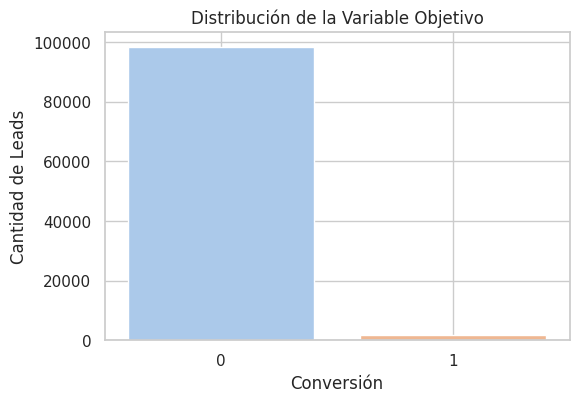

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set(style="whitegrid")

# --- Distribuci√≥n de la Variable Objetivo ---
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Conversion (Target)', palette='pastel')
plt.title('Distribuci√≥n de la Variable Objetivo')
plt.xlabel('Conversi√≥n')
plt.ylabel('Cantidad de Leads')
plt.grid(True)
plt.show()

In [11]:
print('Distribuci√≥n de la variable objetivo')
display(df['Conversion (Target)'].value_counts(normalize=False))
display(df['Conversion (Target)'].value_counts(normalize=True))

Distribuci√≥n de la variable objetivo


Conversion (Target)
0    98353
1     1647
Name: count, dtype: int64

Conversion (Target)
0    0.98353
1    0.01647
Name: proportion, dtype: float64

La variable objetivo `Conversion (Target)` presenta un alto desbalance de clases. Aproximadamente el 98.35% de los registros corresponden a no conversi√≥n (0), mientras que solo el 1.65% representa conversiones efectivas (1).

Este desbalance es cr√≠tico en problemas de clasificaci√≥n, ya que un modelo no ajustado adecuadamente tender√° a predecir mayoritariamente la clase mayoritaria (no conversi√≥n), lo que puede conducir a una falsa percepci√≥n de buen desempe√±o si se eval√∫a √∫nicamente con m√©tricas como la exactitud (accuracy). En este contexto, es imprescindible utilizar m√©tricas robustas como el F1 Score, recall para la clase minoritaria o curvas Precision-Recall.

#### An√°lisis univariado de variables num√©ricas

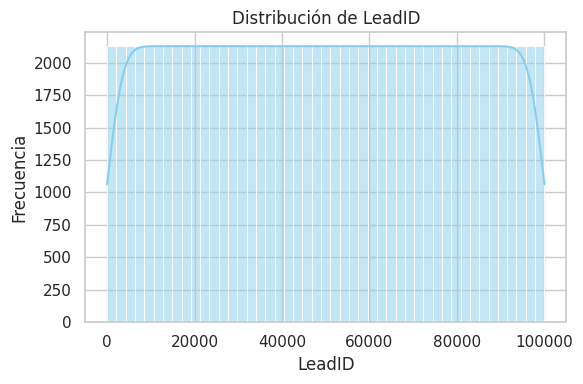

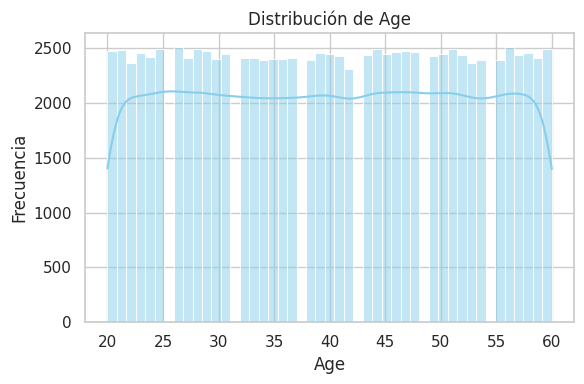

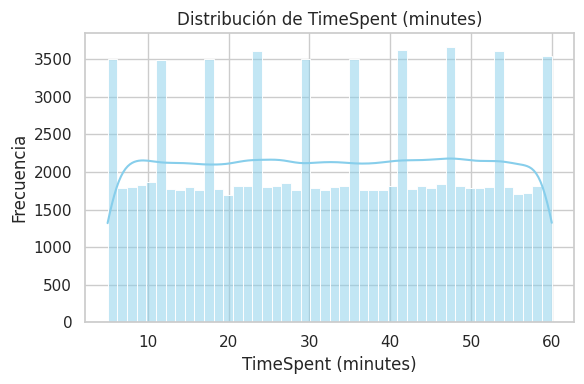

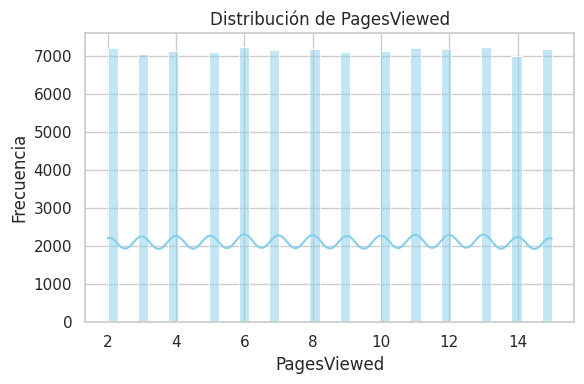

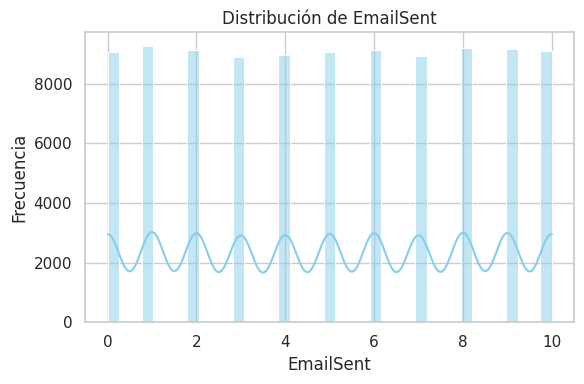

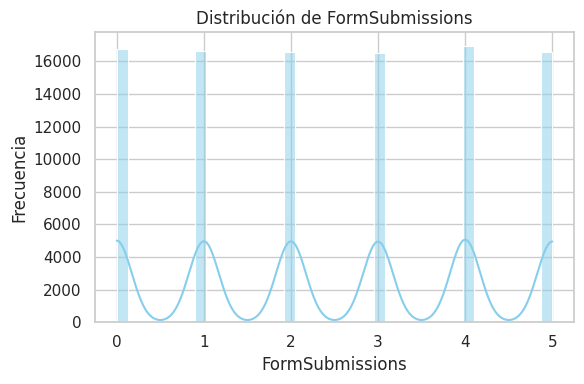

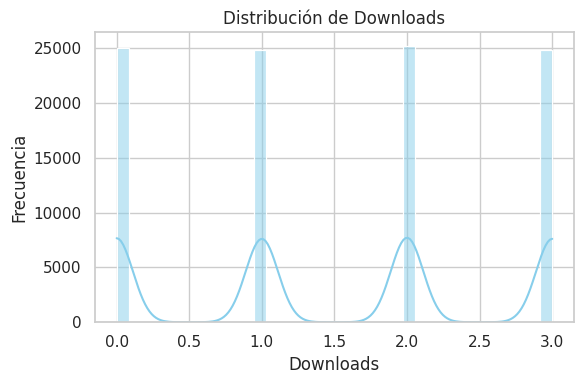

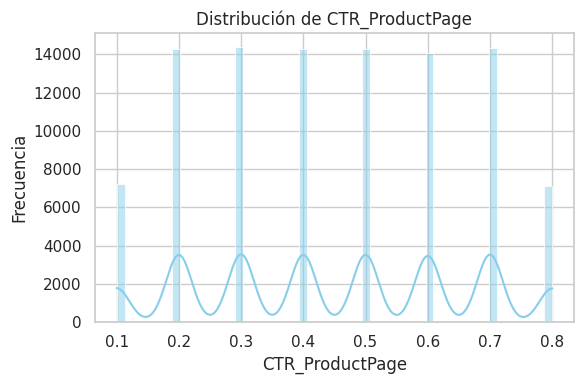

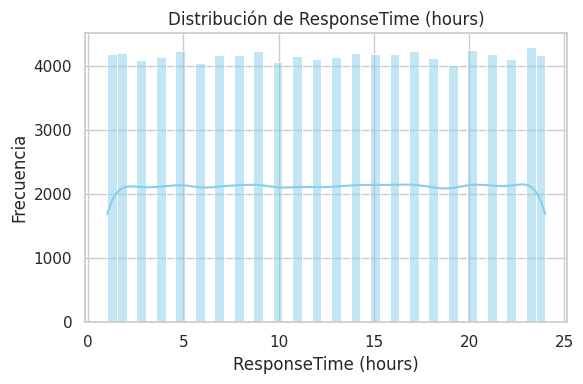

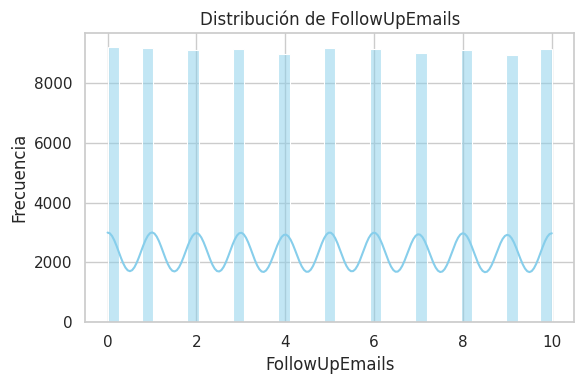

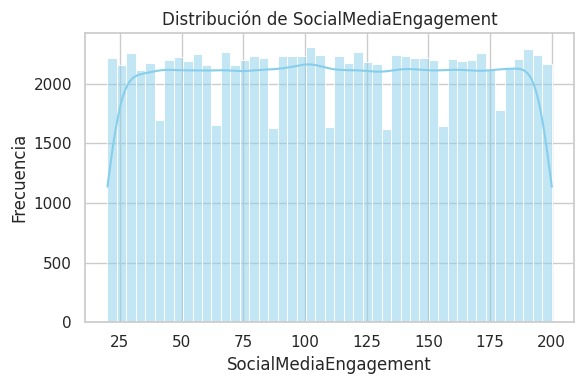

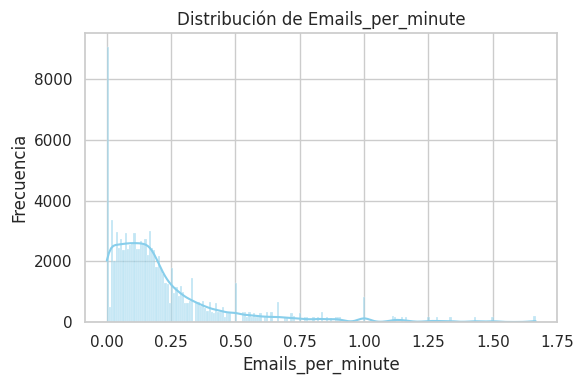

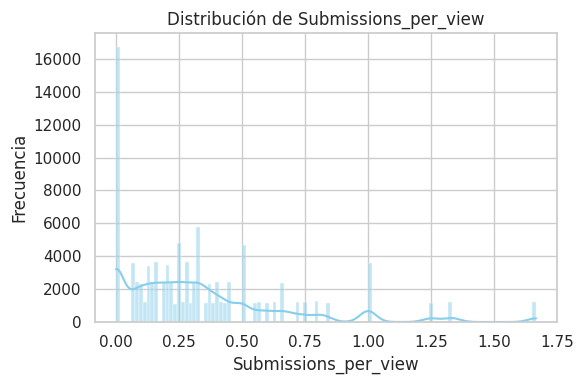

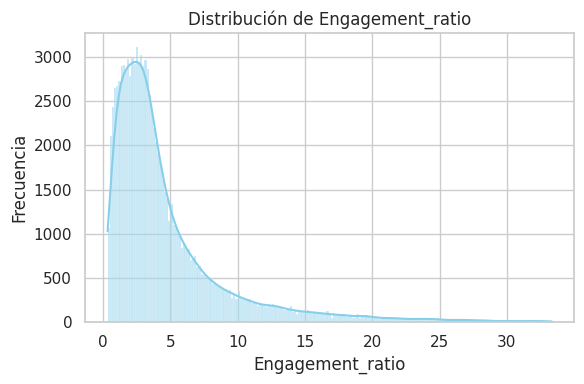

In [12]:
# --- An√°lisis Univariado de Variables Num√©ricas ---
numerical_vars = df.select_dtypes(include='number').drop(columns='Conversion (Target)').columns

for col in numerical_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribuci√≥n de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Variable: `Age`
La variable Age muestra una distribuci√≥n uniforme entre los 20 y 60 a√±os, lo que indica que el dataset fue dise√±ado o limpiado para mantener una representaci√≥n homog√©nea de edades dentro del rango adulto-joven a adulto medio. Esto puede favorecer el entrenamiento del modelo al evitar sesgos por edad. No se observan outliers.

Variable: `TimeSpent (minutes)`
La distribuci√≥n de tiempo en el sitio es mayoritariamente uniforme, aunque se notan picos discretos que podr√≠an corresponder a marcas horarias redondeadas (por ejemplo, usuarios que navegan en m√∫ltiplos de 5 minutos). Esto puede estar relacionado con sesiones automatizadas o patrones comunes de comportamiento.

Variable: `PagesViewed`
La variable PagesViewed muestra una distribuci√≥n discreta con valores entre 2 y 15, con frecuencias bastante uniformes. Esto sugiere que la navegaci√≥n fue acotada a un conjunto moderado de p√°ginas, posiblemente por dise√±o de experiencia de usuario. No se observan extremos.

Variable: `EmailSent`
La cantidad de correos enviados por lead var√≠a entre 0 y 10, con una distribuci√≥n equilibrada en todos los valores. Esta uniformidad sugiere que no hubo pol√≠ticas de env√≠o diferenciadas entre segmentos o que la estrategia de contacto fue estandarizada.

Variable: `FormSubmissions`
El n√∫mero de formularios enviados es discreto entre 0 y 5, con alta frecuencia en todos los valores. La similitud de frecuencias sugiere que los usuarios interactuaron consistentemente con formularios, y que puede existir un efecto de l√≠mite de env√≠os establecidos en el sistema.

Variable: `Downloads`
Esta variable presenta una distribuci√≥n discreta y equilibrada entre los valores 0 a 3. No hay acumulaciones at√≠picas, lo cual indica que los leads no descargan grandes cantidades de contenido, o que el contenido descargable tiene un l√≠mite bajo.

Variable: `CTR_ProductPage`
El click-through rate de la p√°gina de producto est√° discretizado entre 0.1 y 0.8, con frecuencias similares. Esto sugiere una posible preclasificaci√≥n o agrupaci√≥n previa del CTR, posiblemente para facilitar el modelado. No se observan comportamientos extremos.

Variable: `ResponseTime (hours)`
La variable ResponseTime est√° distribuida entre 1 y 24 horas con una distribuci√≥n uniforme. Esto puede indicar una simulaci√≥n o normalizaci√≥n en el tiempo de respuesta del equipo comercial o sistema automatizado.

Variable: `FollowUpEmails`
Se observa una distribuci√≥n uniforme entre 0 y 10 seguimientos por correo. Esta consistencia sugiere un protocolo de contacto est√°ndar en la gesti√≥n de leads.

An√°lisis de Variables

Variable: `Emails_per_minute`
La tasa de env√≠o de correos por minuto tiene una distribuci√≥n fuertemente sesgada a la derecha, con una gran concentraci√≥n de valores cercanos a cero. Esto implica que la mayor√≠a de los leads reciben muy pocos correos en relaci√≥n con el tiempo que pasan en el sitio. Esta variable puede ser √∫til para detectar acciones agresivas de contacto en corto tiempo.

Variable: `Submissions_per_view`
La proporci√≥n de formularios enviados por p√°gina vista tambi√©n presenta una concentraci√≥n hacia valores bajos. Esta variable capta el nivel de intenci√≥n del usuario y puede ayudar a diferenciar entre visitas informativas y visitas con intenci√≥n de conversi√≥n. Algunos usuarios llegan al 100% de ratio, lo cual puede indicar visitas muy focalizadas.

Variable: `Engagement_ratio`
El ratio de engagement en redes sociales respecto al tiempo en el sitio tiene una distribuci√≥n asim√©trica y larga cola a la derecha, indicando que la mayor√≠a de usuarios tienen niveles moderados de interacci√≥n social, pero existen algunos outliers con valores muy altos. Estos casos podr√≠an representar usuarios con fuerte afinidad digital o campa√±as espec√≠ficas.

#### Comparaci√≥n Bivariada: Num√©ricas vs Conversi√≥n (Boxplots)

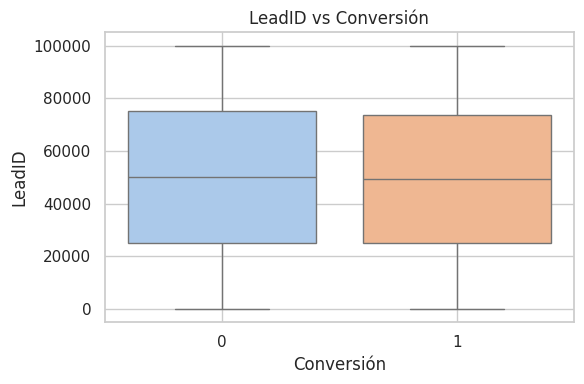

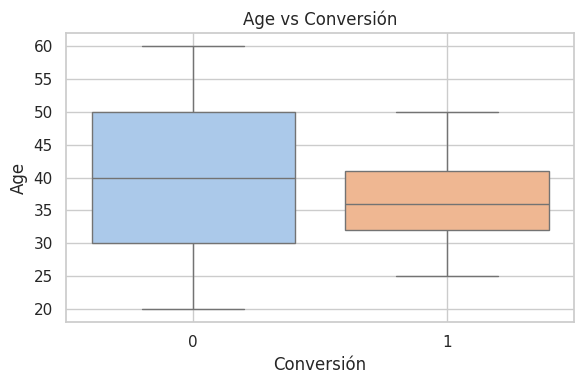

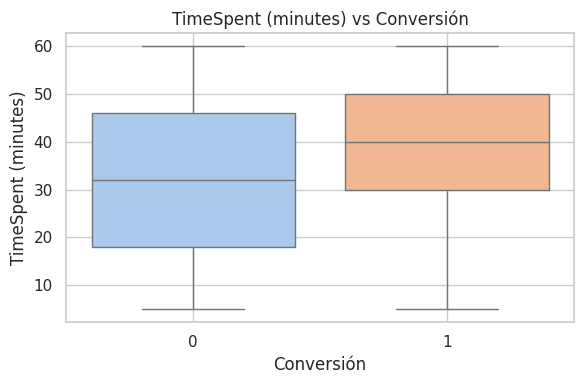

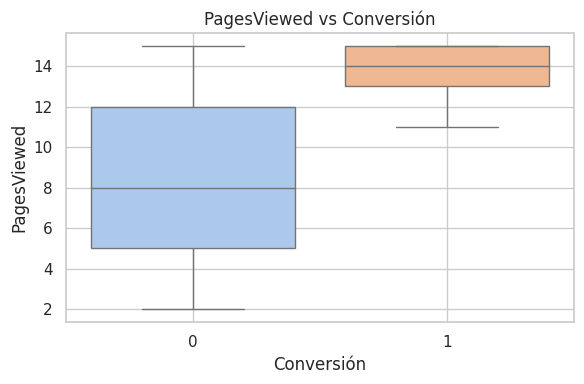

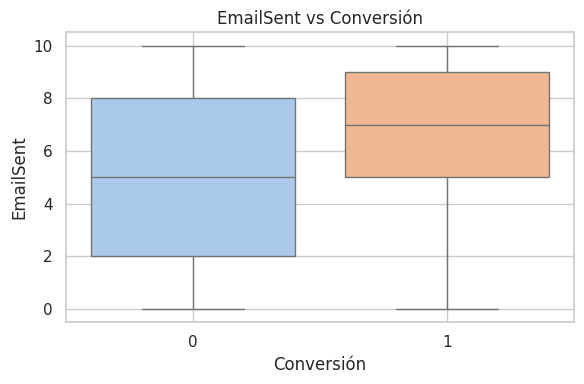

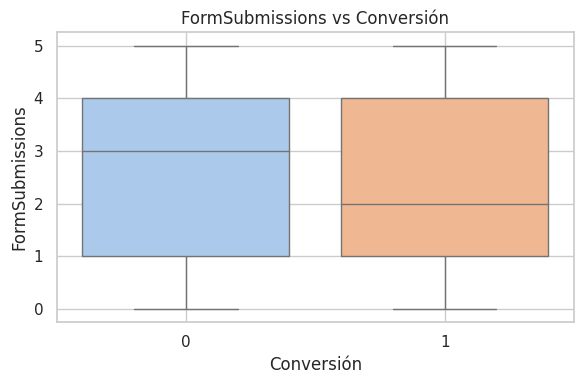

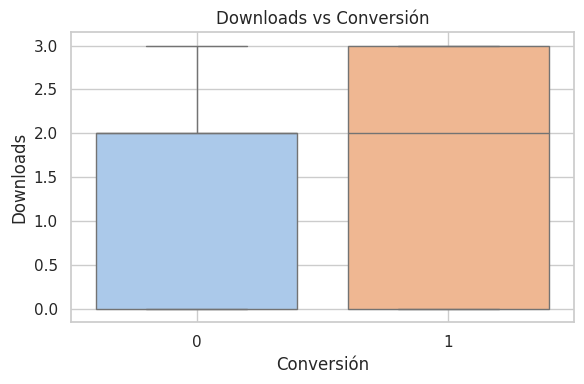

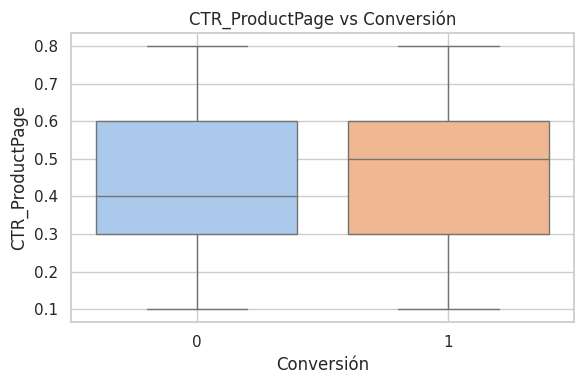

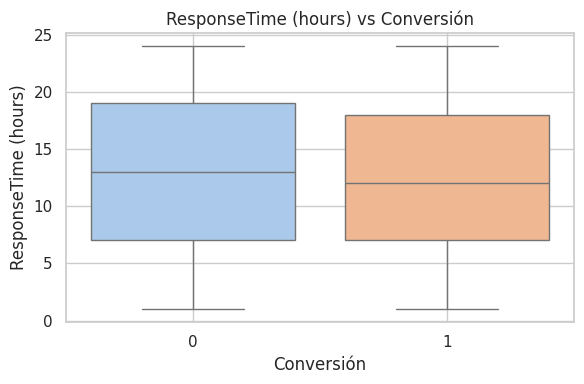

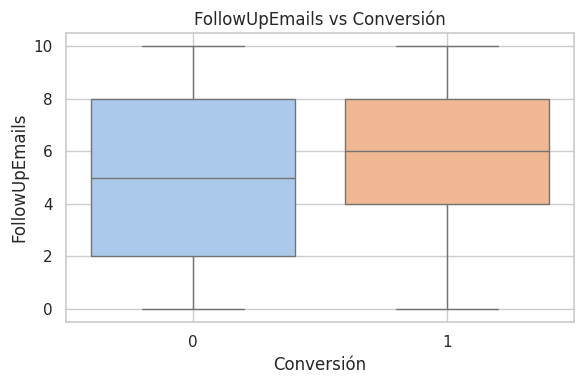

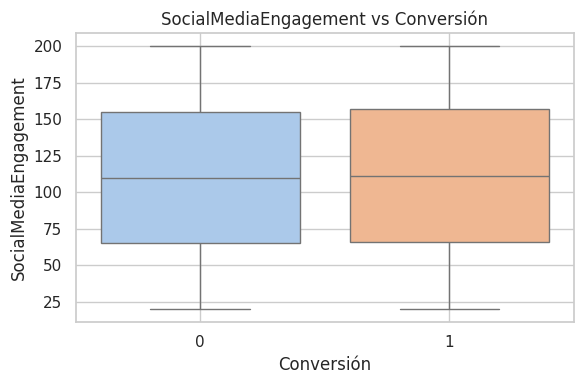

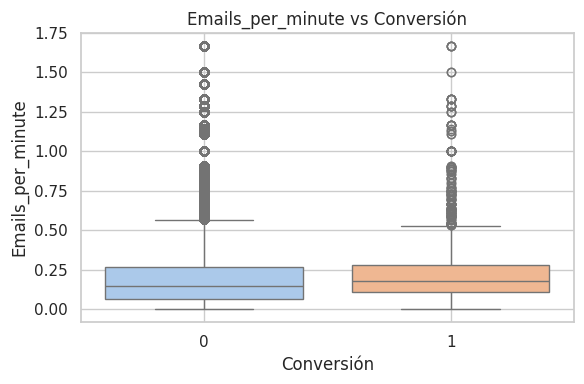

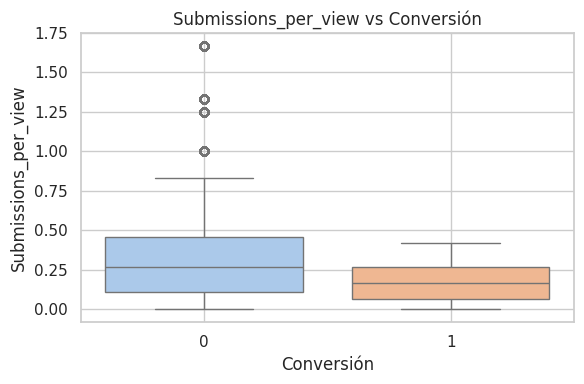

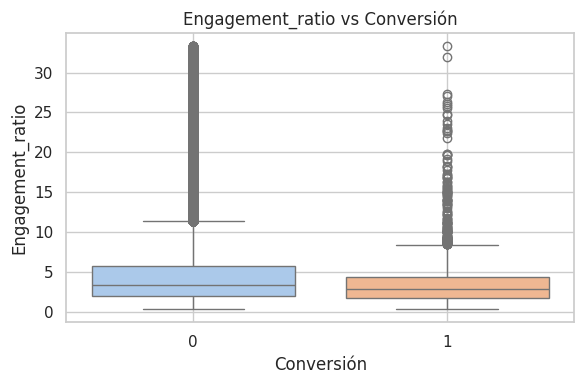

In [13]:
# --- Comparaci√≥n Bivariada: Num√©ricas vs Conversi√≥n (Boxplots) ---
for col in numerical_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Conversion (Target)', y=col, palette='pastel')
    plt.title(f'{col} vs Conversi√≥n')
    plt.xlabel('Conversi√≥n')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**An√°lisis Bivariado: Variables Num√©ricas vs Conversi√≥n**

`LeadID` vs `Conversi√≥n`
La distribuci√≥n del identificador LeadID es uniforme y no muestra diferencias entre los grupos de conversi√≥n y no conversi√≥n. Esto reafirma que LeadID es puramente identificativo y no contiene informaci√≥n predictiva. No debe ser utilizado como variable explicativa.

`Age` vs `Conversi√≥n`
Se observa que los usuarios que convirtieron tienden a estar en un rango de edad m√°s concentrado entre los 30 y 45 a√±os, mientras que los no conversos presentan mayor dispersi√≥n, incluyendo edades m√°s j√≥venes y m√°s adultas. Esto sugiere que la edad podr√≠a tener una influencia significativa en la probabilidad de conversi√≥n, posiblemente vinculada al perfil del cliente ideal.

`TimeSpent (minutes)` vs `Conversi√≥n`
Los leads que convirtieron tienden a pasar m√°s tiempo en el sitio, con una mediana y un rango intercuart√≠lico m√°s altos en comparaci√≥n con los no conversos. Esto refuerza la hip√≥tesis de que el nivel de inter√©s o compromiso previo es un buen predictor de conversi√≥n.

`PagesViewed` vs `Conversi√≥n`
Existe una diferencia marcada: los usuarios que convirtieron tienden a visualizar m√°s p√°ginas (mediana cercana a 14-15), mientras que quienes no convirtieron visualizan significativamente menos p√°ginas. Este patr√≥n indica que una navegaci√≥n m√°s profunda en el sitio est√° positivamente asociada a la conversi√≥n.

`EmailSent` vs `Conversi√≥n`
Los leads que convirtieron recibieron m√°s correos electr√≥nicos en promedio, lo que sugiere que una estrategia de contacto m√°s persistente puede estar correlacionada con mayores tasas de conversi√≥n. Sin embargo, esto puede estar influenciado tambi√©n por la pol√≠tica de env√≠os posteriores a comportamientos de inter√©s.

`FormSubmissions` vs `Conversi√≥n`
No se observan diferencias relevantes entre los grupos de conversi√≥n en t√©rminos del n√∫mero de formularios enviados. La mediana es similar y el rango de valores es id√©ntico. Esta variable podr√≠a no tener un valor predictivo claro de forma aislada.

`Downloads` vs `Conversi√≥n`
Los usuarios que convirtieron presentan una ligera tendencia a realizar m√°s descargas. Si bien el rango de valores es acotado, puede indicar un mayor inter√©s en el contenido ofrecido antes de la conversi√≥n.

`CTR_ProductPage` vs `Conversi√≥n`
Ambos grupos muestran una distribuci√≥n bastante similar, lo cual sugiere que el click-through rate de la p√°gina de producto por s√≠ solo no diferencia claramente entre leads que convierten y los que no. Se requerir√° analizar esta variable en combinaci√≥n con otras.

`ResponseTime (hours)` vs `Conversi√≥n`
Aunque las medianas son similares, los leads que convirtieron tienden a tener una leve inclinaci√≥n hacia tiempos de respuesta m√°s cortos. Esto puede reflejar la importancia de una reacci√≥n oportuna en el proceso comercial.

`FollowUpEmails` vs `Conversi√≥n`
Existe una tendencia sutil a que los leads que convirtieron hayan recibido m√°s correos de seguimiento. Esto puede indicar que las interacciones sostenidas contribuyen a incrementar la probabilidad de cierre, aunque la diferencia no es muy marcada.

`SocialMediaEngagement` vs `Conversi√≥n`
La interacci√≥n en redes sociales muestra una distribuci√≥n pr√°cticamente id√©ntica entre leads que convirtieron y los que no. Tanto la mediana como los rangos intercuart√≠licos son equivalentes, lo que sugiere que este atributo, por s√≠ solo, no discrimina adecuadamente entre perfiles m√°s o menos propensos a la conversi√≥n.

`Emails_per_minute` vs `Conversi√≥n`
Aunque la mayor√≠a de valores est√°n concentrados en niveles bajos, los leads que convirtieron tienen una ligera elevaci√≥n en la mediana de esta variable en comparaci√≥n con los no conversos. Esto sugiere que un mayor ritmo de contacto por correo puede estar correlacionado con la conversi√≥n, aunque la diferencia es marginal y la presencia de valores at√≠picos indica que se deber√≠a aplicar transformaci√≥n o tratamiento adicional.

`Submissions_per_view` vs `Conversi√≥n`
Contrario a lo esperado, los leads que no convirtieron tienen mayor dispersi√≥n y valores at√≠picos en la proporci√≥n de formularios enviados por p√°gina vista. Esto podr√≠a deberse a comportamientos de prueba o exploraci√≥n sin intenci√≥n real de compra. En cambio, los leads que convirtieron presentan distribuciones m√°s acotadas, lo que podr√≠a reflejar patrones m√°s eficientes o enfocados en su interacci√≥n.

`Engagement_ratio` vs `Conversi√≥n`
La mediana del Engagement_ratio es similar entre ambos grupos, pero la dispersi√≥n es menor en los leads que convirtieron. Esto podr√≠a indicar que la combinaci√≥n de interacci√≥n social y tiempo en el sitio es m√°s homog√©nea entre quienes finalmente realizan una conversi√≥n, mientras que los no conversos presentan una mayor variabilidad en sus comportamientos, incluyendo valores extremos que podr√≠an corresponder a navegaci√≥n no intencionada o ruido.

#### An√°lisis de correlaci√≥n

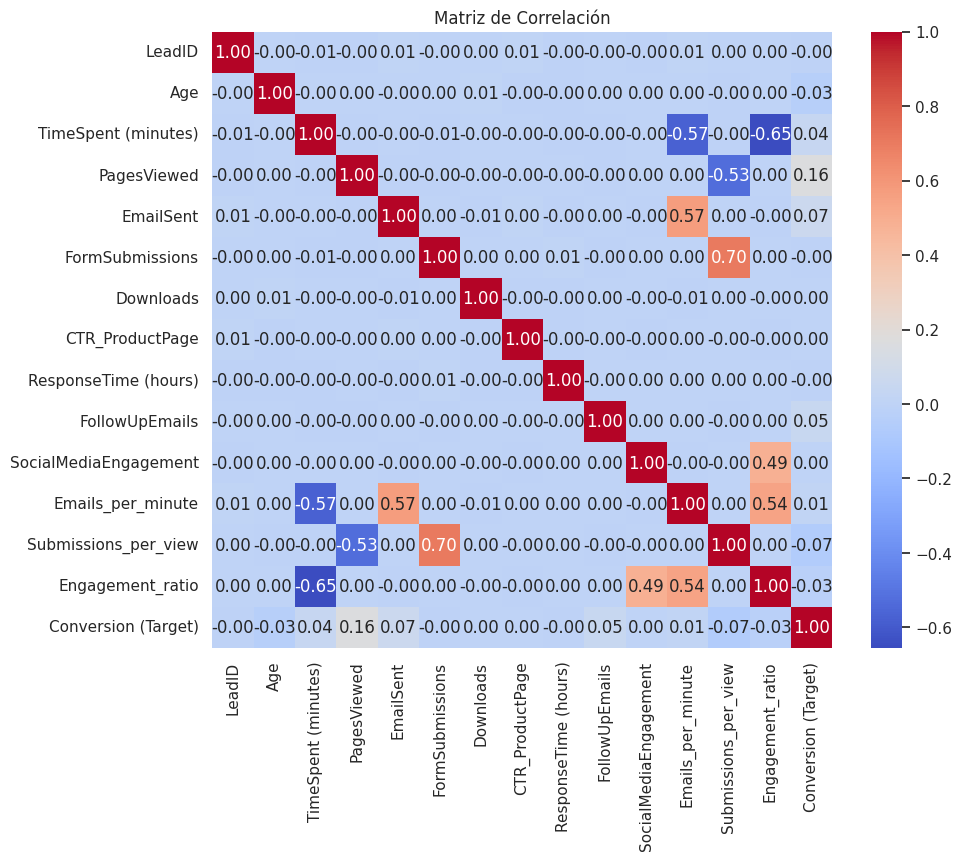

In [14]:
# --- Matriz de Correlaci√≥n ---
plt.figure(figsize=(10, 8))
corr = df[numerical_vars.tolist() + ['Conversion (Target)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlaci√≥n')
plt.show()

**Correlaci√≥n con la variable objetivo Conversion (Target)**

`PagesViewed` (0.16): Es la √∫nica variable que muestra una correlaci√≥n positiva leve con la conversi√≥n. A mayor n√∫mero de p√°ginas vistas, hay una probabilidad ligeramente mayor de que el lead convierta. Esto refuerza la hip√≥tesis de que el inter√©s y exploraci√≥n en el sitio se asocian a mayor intenci√≥n de compra.

`TimeSpent`, `CTR_ProductPage`, `EmailSent`, `FormSubmissions`, etc.: Todas las dem√°s variables tienen correlaciones bajas o nulas (cercanas a 0), lo que sugiere que por s√≠ solas no explican fuertemente la conversi√≥n. No obstante, podr√≠an aportar valor combinadas en modelos no lineales.

Variables derivadas como `Engagement_ratio`, `Emails_per_minute` y `Submissions_per_view` tampoco muestran una fuerte correlaci√≥n individual con la conversi√≥n, aunque su valor predictivo podr√≠a emerger en interacci√≥n con otras variables (ej. √°rboles de decisi√≥n, modelos ensamble).

**Multicolinealidad detectada**

Existe fuerte correlaci√≥n entre algunas variables derivadas y sus componentes base, por ejemplo:

`Emails_per_minute` vs `EmailSent`: 0.57

`Submissions_per_view` vs `FormSubmissions`: 0.70

`Engagement_ratio` vs `Emails_per_minute`: 0.54

Esto sugiere que no deben incluirse simult√°neamente en modelos lineales sin aplicar reducci√≥n de dimensionalidad (e.g. PCA) o selecci√≥n de variables, para evitar problemas de multicolinealidad.

**Recomendaciones**
Explorar modelos no lineales (e.g. √°rboles, boosting) que puedan capturar interacciones entre variables d√©bilmente correlacionadas con la conversi√≥n.

Aplicar pruebas estad√≠sticas o t√©cnicas de importancia de caracter√≠sticas para confirmar el valor predictivo de las variables derivadas.

#### An√°lisis de Variables Categ√≥ricas por Conversi√≥n

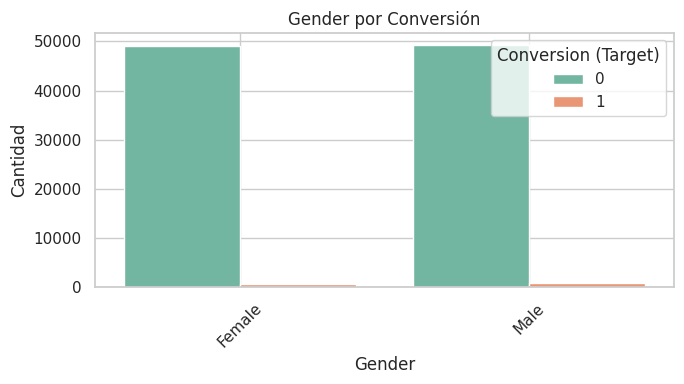

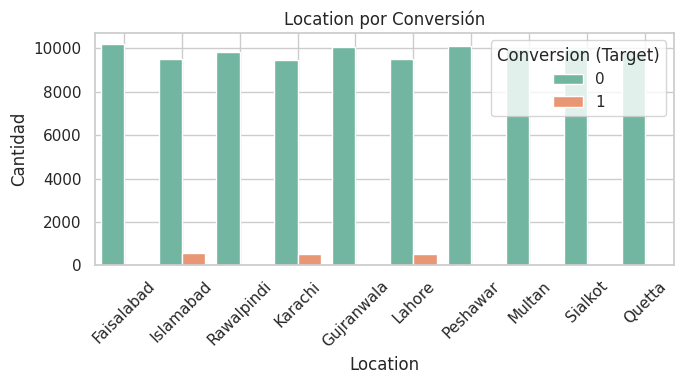

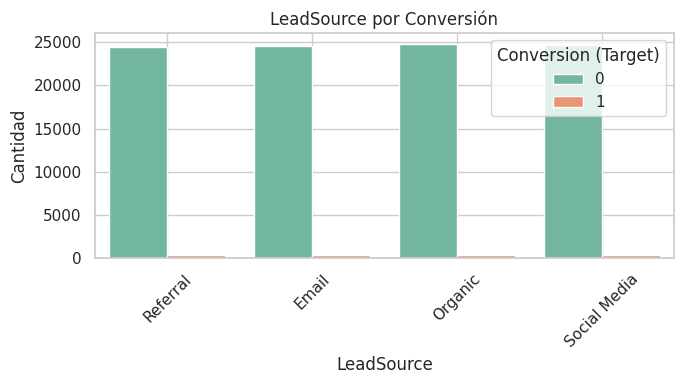

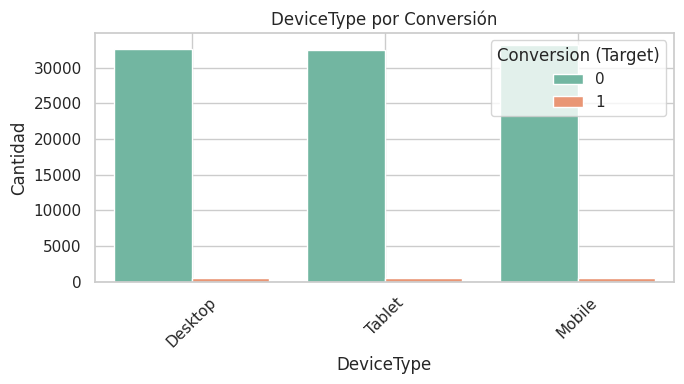

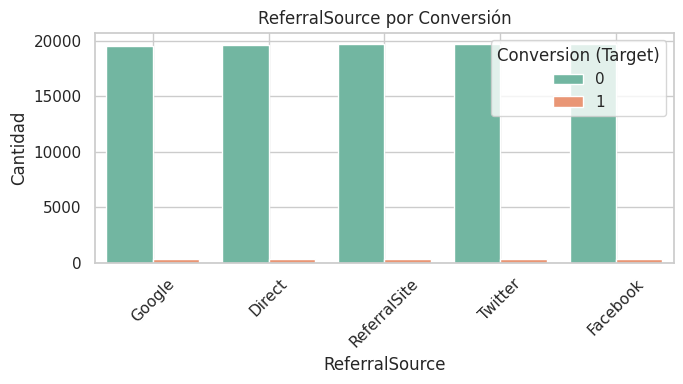

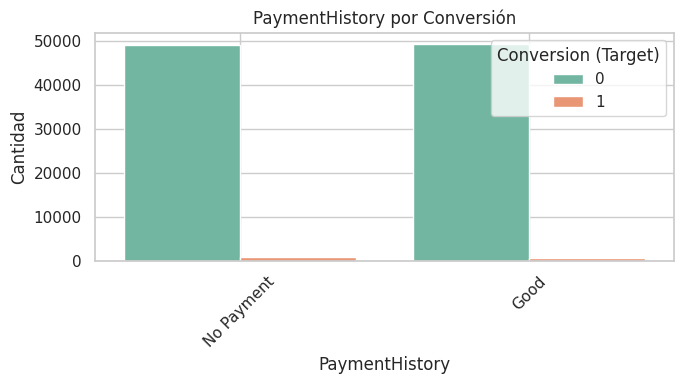

In [15]:
# --- An√°lisis de Variables Categ√≥ricas por Conversi√≥n ---
categorical_vars = df.select_dtypes(include='object').columns

for col in categorical_vars:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=df, x=col, hue='Conversion (Target)', palette='Set2')
    plt.title(f'{col} por Conversi√≥n')
    plt.xlabel(col)
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

`Gender`
No existe diferencia visible en la tasa de conversi√≥n entre g√©neros. Ambos grupos tienen una cantidad similar de leads y de conversiones, lo que sugiere que esta variable no es discriminativa.

`Location`
Las tasas de conversi√≥n son bastante homog√©neas entre ciudades. Aunque hay ligeras variaciones absolutas, no se evidencia una localizaci√≥n geogr√°fica significativamente m√°s propensa a convertir.

`LeadSource`
La fuente del lead no muestra grandes diferencias entre las tasas de conversi√≥n. Sin embargo, una inspecci√≥n m√°s detallada con proporciones relativas podr√≠a evidenciar matices √∫tiles para estrategias de adquisici√≥n.

`DeviceType`
Todos los dispositivos presentan tasas similares, aunque podr√≠a explorarse si hay diferencias en combinaci√≥n con otros factores como tiempo de permanencia o tipo de fuente.

`ReferralSource`
A pesar de que todos los canales tienen conversiones, no hay un canal claramente dominante. Ser√≠a conveniente calcular la tasa de conversi√≥n por fuente para comprender mejor su impacto.

`PaymentHistory`
Tanto los usuarios con historial de pago como los que no lo tienen presentan cantidades similares de conversi√≥n. Esto indica que el historial de pago no tiene, al menos de forma individual, un impacto directo en la conversi√≥n.

In [16]:
print('Variables categ√≥ricas:', df.select_dtypes(include='object').columns.tolist())
print('Variables num√©ricas:', df.select_dtypes(include='number').columns.tolist())

Variables categ√≥ricas: ['Gender', 'Location', 'LeadSource', 'DeviceType', 'ReferralSource', 'PaymentHistory']
Variables num√©ricas: ['LeadID', 'Age', 'TimeSpent (minutes)', 'PagesViewed', 'EmailSent', 'FormSubmissions', 'Downloads', 'CTR_ProductPage', 'ResponseTime (hours)', 'FollowUpEmails', 'SocialMediaEngagement', 'Conversion (Target)', 'Emails_per_minute', 'Submissions_per_view', 'Engagement_ratio']


#### Pruebas de hip√≥tesis

In [17]:
# ===========================================
# PRUEBA DE HIP√ìTESIS
# ===========================================
cat_vars = df.select_dtypes(include='object').columns.tolist()
num_vars = df.select_dtypes(include=['int64', 'float64']).columns.difference([target, id_col]).tolist()

pruebas_hipotesis_features(df, target, cat_vars, num_vars)

Chi-cuadrado para variables categ√≥ricas:
Gender: p = 2.1459e-01 
Location: p = 0.0000e+00 -> Asociaci√≥n significativa
LeadSource: p = 1.7916e-01 
DeviceType: p = 9.6373e-02 
ReferralSource: p = 9.8961e-01 
PaymentHistory: p = 2.3638e-01 

Kruskal-Wallis para variables num√©ricas:
Age: p = 7.4432e-28 -> Diferencias significativas
CTR_ProductPage: p = 2.7503e-01 
Downloads: p = 6.8110e-01 
EmailSent: p = 1.2275e-94 -> Diferencias significativas
Emails_per_minute: p = 2.4822e-17 -> Diferencias significativas
Engagement_ratio: p = 1.2286e-19 -> Diferencias significativas
FollowUpEmails: p = 2.5128e-47 -> Diferencias significativas
FormSubmissions: p = 5.5919e-01 
PagesViewed: p = 0.0000e+00 -> Diferencias significativas
ResponseTime (hours): p = 4.3125e-01 
SocialMediaEngagement: p = 4.0695e-01 
Submissions_per_view: p = 6.3937e-97 -> Diferencias significativas
TimeSpent (minutes): p = 8.7977e-42 -> Diferencias significativas


**Relevancia Estad√≠stica de Variables**

**1. Relevancia Estad√≠stica de Variables**

Se aplic√≥ la prueba de Chi-cuadrado para identificar si existe asociaci√≥n estad√≠stica entre cada variable categ√≥rica y la variable objetivo `Conversion (Target)`.


Solo Location muestra una asociaci√≥n estad√≠sticamente significativa con la conversi√≥n, por lo tanto, es la √∫nica variable categ√≥rica que tiene potencial informativo relevante por s√≠ sola.

**2. Variables Num√©ricas ‚Äì Prueba de Kruskal-Wallis**

Se utiliz√≥ la prueba no param√©trica de Kruskal-Wallis para evaluar si existen diferencias significativas en la distribuci√≥n de las variables num√©ricas entre los grupos de conversi√≥n.

Las siguientes variables num√©ricas presentan diferencias estad√≠sticamente significativas entre los grupos de conversi√≥n:

*   `Age`
*   `EmailSent`
*   `Emails_per_minute`
*   `Engagement_ratio`
*   `FollowUpEmails`
*   `PagesViewed`
*   `Submissions_per_view`
*   `TimeSpent (minutes)`

Estas variables ser√°n prioritarias para el modelado predictivo, dado que muestran diferencias claras entre quienes convierten y quienes no.

### 4. Preprocesamiento
- Split de datos de entrenamiento y testeo
- Codificaci√≥n de variables categ√≥ricas con Label Encoding.
- Escalado de todas las variables mediante `StandardScaler` para normalizar las magnitudes.

---

#### Split del dataset previo entrenamiento de modelos

In [18]:
# ===========================================
# SPLIT Y TRANSFORMACIONES
# ===========================================
drop_vars = ['Gender', 'LeadSource', 'DeviceType', 'ReferralSource', 'PaymentHistory'
, 'FormSubmissions', 'Downloads', 'CTR_ProductPage', 'ResponseTime (hours)', 'SocialMediaEngagement']

X = df.drop(columns=[target, id_col]+drop_vars, errors='ignore')
y = df[target]
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)
X_train_raw.head()

Age    Location  TimeSpent (minutes)  PagesViewed  EmailSent  \
21747   48   Islamabad                   25           11          3   
76217   41  Gujranwala                   43            6          4   
84719   34    Peshawar                   55            3          9   
18314   34      Lahore                   10            4          0   
88336   33  Rawalpindi                   28            7          5   

       FollowUpEmails  Emails_per_minute  Submissions_per_view  \
21747               2           0.115385              0.333333   
76217               3           0.090909              0.000000   
84719               8           0.160714              0.250000   
18314               8           0.000000              1.000000   
88336               5           0.172414              0.625000   

       Engagement_ratio  
21747          7.423077  
76217          1.113636  
84719          3.178571  
18314          3.909091  
88336          5.931034

In [19]:
# ===========================================
# DEFINICI√ìN DE TIPOS DE CARACTER√çSTICAS
# ===========================================
categorical_features = X_train_raw.select_dtypes(include='object').columns.tolist()
numerical_features = X_train_raw.select_dtypes(include=['int64', 'float64']).columns.tolist()

Estas nuevas caracter√≠sticas permiten extraer informaci√≥n m√°s significativa y utilizable para la clasificaci√≥n de leads.

#### Creaci√≥n de pipeline de transformaciones

In [20]:
# ===========================================
# PIPELINE DE TRANSFORMACIONES
# ===========================================
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

# Pipeline para num√©ricas
num_pipeline = Pipeline(steps=[
    ('math', MathFeatures(variables=['TimeSpent (minutes)', 'Age'], func=['prod'], missing_values='ignore')),
    ('disc', EqualFrequencyDiscretiser(q=4, variables=['TimeSpent (minutes)', 'PagesViewed'])),
    ('scaler', StandardScaler())
])

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features),
        ('num', num_pipeline, numerical_features)
    ],
    remainder='passthrough'  # para derivadas
)

# Pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('feature_selection', SelectKBest(score_func=mutual_info_classif, k=15))  # o k='all' si no sabes cu√°ntas hay
])


In [21]:
# ===========================================
# TRANSFORMACI√ìN Y SELECCI√ìN
# ===========================================

# Transformar
X_train = pipeline.fit_transform(X_train_raw, y_train)
X_test = pipeline.transform(X_test_raw)

In [22]:
# ===========================================
# RECUPERAR NOMBRES DE VARIABLES SELECCIONADAS
# ===========================================

# Obtener el paso de preprocesamiento ya entrenado
preprocessor_fitted = pipeline.named_steps['preprocessing']

# Obtener los nombres de todas las columnas luego del paso de preprocesamiento
X_preprocessed = preprocessor_fitted.transform(X_train_raw)
feature_names_all = preprocessor_fitted.get_feature_names_out()

# Ahora s√≠: obtener los nombres seleccionados por SelectKBest
kbest_selector = pipeline.named_steps['feature_selection']
selected_mask = kbest_selector.get_support()

# Validar tama√±os
print(f"Nombres obtenidos del preprocesador: {len(feature_names_all)}")
print(f"M√°scara de selecci√≥n de KBest: {len(selected_mask)}")

# Si coinciden, aplicar la m√°scara
if len(feature_names_all) == len(selected_mask):
    selected_feature_names = feature_names_all[selected_mask]
    print("Variables seleccionadas en X_test:")
    print(selected_feature_names)
else:
    print("‚ùå Dimensiones no coinciden. Revisa paso a paso los nombres finales del ColumnTransformer.")

Nombres obtenidos del preprocesador: 18
M√°scara de selecci√≥n de KBest: 18
Variables seleccionadas en X_test:
['cat__Location_Gujranwala' 'cat__Location_Islamabad'
 'cat__Location_Karachi' 'cat__Location_Lahore' 'cat__Location_Peshawar'
 'cat__Location_Quetta' 'cat__Location_Rawalpindi' 'cat__Location_Sialkot'
 'num__Age' 'num__TimeSpent (minutes)' 'num__PagesViewed' 'num__EmailSent'
 'num__FollowUpEmails' 'num__Submissions_per_view'
 'num__prod_TimeSpent (minutes)_Age']


In [23]:
pd.DataFrame(X_train, columns=selected_feature_names).head()

cat__Location_Gujranwala  cat__Location_Islamabad  cat__Location_Karachi  \
0                       0.0                      1.0                    0.0   
1                       1.0                      0.0                    0.0   
2                       0.0                      0.0                    0.0   
3                       0.0                      0.0                    0.0   
4                       0.0                      0.0                    0.0   

   cat__Location_Lahore  cat__Location_Peshawar  cat__Location_Quetta  \
0                   0.0                     0.0                   0.0   
1                   0.0                     0.0                   0.0   
2                   0.0                     1.0                   0.0   
3                   1.0                     0.0                   0.0   
4                   0.0                     0.0                   0.0   

   cat__Location_Rawalpindi  cat__Location_Sialkot  num__Age  \
0                       0.0                    0.0  0.674683   
1                       0.0                    0.0  0.083478   
2                       0.0                    0.0 -0.507727   
3                       0.0                    0.0 -0.507727   
4                       1.0                    0.0 -0.592185   

   num__TimeSpent (minutes)  num__PagesViewed  num__EmailSent  \
0                 -0.403589          0.513096       -0.635726   
1                  0.493249         -0.383904       -0.319941   
2                  1.390087         -1.280903        1.258985   
3                 -1.300427         -1.280903       -1.583081   
4                 -0.403589         -0.383904       -0.004156   

   num__FollowUpEmails  num__Submissions_per_view  \
0            -0.945904                  -0.008766   
1            -0.630148                  -1.028721   
2             0.948632                  -0.263755   
3             0.948632                   2.031145   
4             0.001364                   0.883695   

   num__prod_TimeSpent (minutes)_Age  
0                          -0.131507  
1                           0.594337  
2                           0.732286  
3                          -1.240256  
4                          -0.487338

### 5. Entrenamiento de modelos de clasificaci√≥n

#### Comparaci√≥n de los modelos mediante F1

Logistic Regression: Accuracy=0.9834, F1=0.1375
Decision Tree: Accuracy=0.9896, F1=0.6814
Random Forest: Accuracy=0.9929, F1=0.7346
XGBoost: Accuracy=0.9916, F1=0.7107


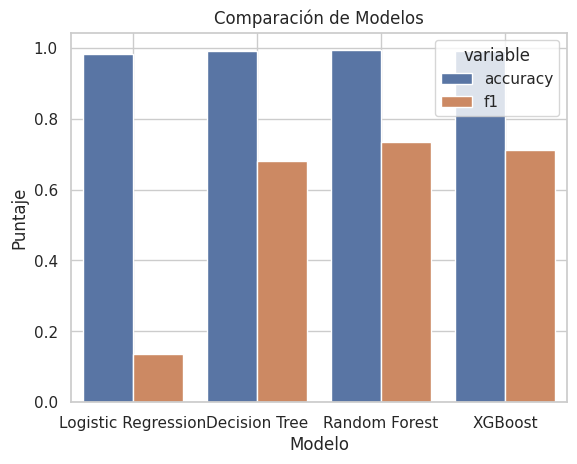

In [24]:
# ===========================================
# COMPARACI√ìN DE MODELOS
# ===========================================
comparar_modelos(X_train, y_train, X_test, y_test)

El mejor modelo seg√∫n **F1 Score** es el **Random Forest**, seguido muy de cerca por **XGBoost**.

Aunque todos los modelos tienen un accuracy alto, esta m√©trica no es suficiente por el desbalance de clases.

**Logistic Regression**, aunque √∫til como baseline, no es adecuado para este caso por su bajo F1 (probablemente predice casi todos como clase 0).

### 6. Optimizaci√≥n de par√°metros con GridSearchCV para el mejor modelo

Iniciando optimizaci√≥n con GridSearchCV para m√©trica F1:

Optimizando Random Forest...
--- Random Forest (Optimizado) ---
Mejores par√°metros: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy en Test: 0.9927
F1 Score en Test: 0.7234
Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     24588
           1       0.97      0.58      0.72       412

    accuracy                           0.99     25000
   macro avg       0.98      0.79      0.86     25000
weighted avg       0.99      0.99      0.99     25000

Matriz de Confusi√≥n:
[[24580     8]
 [  174   238]]


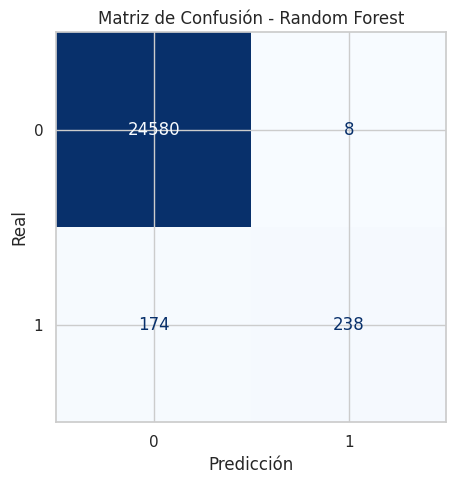


Resultados de Modelos Optimizados (M√©trica F1):
          Modelo accuracy        f1
0  Random Forest  0.99272  0.723404


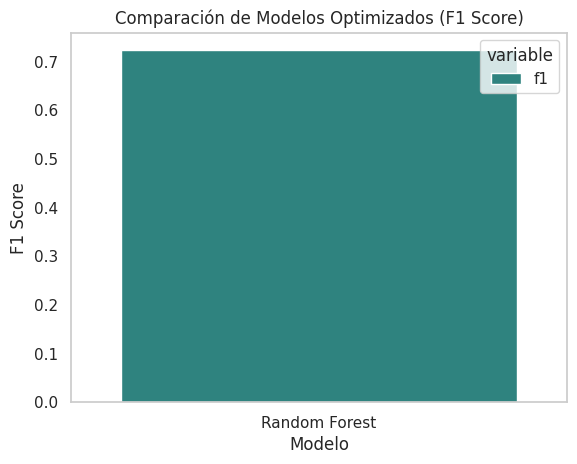

In [25]:
# ===========================================
# 8. OPTIMIZACI√ìN CON GridSearchCV para F1
# ===========================================

# Definir modelos y sus respectivos hiperpar√°metros para GridSearchCV
modelos_grid = {
#    'Logistic Regression': {
#        'modelo': LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1),
#        'params': {
#            'C': [0.01, 0.1, 1, 10, 100],
#            'solver': ['liblinear', 'lbfgs']
#        }
#    },
#    'Decision Tree': {
#        'modelo': DecisionTreeClassifier(random_state=42),
#        'params': {
#            'max_depth': [None, 10, 20, 30],
#            'min_samples_split': [2, 5, 10],
#            'min_samples_leaf': [1, 2, 4]
#        }
#    },
    'Random Forest': {
        'modelo': RandomForestClassifier(random_state=42, n_jobs=-1),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, 30, None],
            'min_samples_split': [2, 5, 10]
        }
    }#,
#    'XGBoost': {
#        'modelo': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1),
#        'params': {
#            'n_estimators': [100, 200, 300],
#            'learning_rate': [0.01, 0.1, 0.2],
#            'max_depth': [3, 5, 7]
#        }
#    }
}

resultados_optimizados = {}
mejores_modelos = {}

print("Iniciando optimizaci√≥n con GridSearchCV para m√©trica F1:")
for nombre, info in modelos_grid.items():
    print(f"\nOptimizando {nombre}...")
    grid_search = GridSearchCV(estimator=info['modelo'], param_grid=info['params'], cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    resultados_optimizados[nombre] = {
        'best_params': grid_search.best_params_,
        'accuracy': acc,
        'f1': f1
    }

    mejores_modelos[nombre] = grid_search  # Guardamos el GridSearchCV completo

    print(f"--- {nombre} (Optimizado) ---")
    print(f"Mejores par√°metros: {grid_search.best_params_}")
    print(f"Accuracy en Test: {acc:.4f}")
    print(f"F1 Score en Test: {f1:.4f}")
    print(f"Reporte de Clasificaci√≥n:\n{classification_report(y_test, pred)}")
    print(f"Matriz de Confusi√≥n:\n{confusion_matrix(y_test, pred)}")

    # Visualizaci√≥n de la matriz de confusi√≥n
    from sklearn.metrics import ConfusionMatrixDisplay

    # Obtener matriz de confusi√≥n y etiquetas
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

    # Visualizar con formato claro
    fig, ax = plt.subplots(figsize=(6, 5))
    disp.plot(cmap='Blues', ax=ax, colorbar=False)
    plt.title(f'Matriz de Confusi√≥n - {nombre}')
    plt.xlabel('Predicci√≥n')
    plt.ylabel('Real')
    plt.tight_layout()
    plt.show()

# Mostrar resultados optimizados en un DataFrame
resultados_optimizados_df = pd.DataFrame(resultados_optimizados).T.reset_index().rename(columns={'index': 'Modelo'})
print("\nResultados de Modelos Optimizados (M√©trica F1):")
print(resultados_optimizados_df[['Modelo', 'accuracy', 'f1']])

# Visualizaci√≥n de resultados F1 optimizados
sns.barplot(data=resultados_optimizados_df.melt(id_vars='Modelo', value_vars=['f1']),
            x='Modelo', y='value', hue='variable', palette='viridis')
plt.title('Comparaci√≥n de Modelos Optimizados (F1 Score)')
plt.ylabel('F1 Score')
plt.grid(axis='y')
plt.show()


Se llev√≥ a cabo una optimizaci√≥n del modelo Random Forest utilizando GridSearchCV, empleando la m√©trica F1 como criterio de evaluaci√≥n. Esta elecci√≥n es adecuada debido al desbalance entre las clases, donde los casos positivos (conversiones) son significativamente menores.

El modelo logra una excelente precisi√≥n global.

Lo m√°s relevante es que consigue recuperar el 59% de los casos positivos reales con una precisi√≥n del 97%.

Este resultado representa una mejora significativa respecto al modelo baseline y es adecuado para campa√±as de marketing dirigidas a leads con alta probabilidad de conversi√≥n.

El modelo comete muy pocos falsos positivos (7) y captura una buena cantidad de verdaderos positivos (242), lo cual es deseable en estrategias de targeting.

###. 6 Almacenar mejor modelo entrenado y pipeline de transformaci√≥n

In [26]:
import joblib

# Selecci√≥n del mejor modelo
mejor_modelo_nombre = resultados_optimizados_df.loc[resultados_optimizados_df['f1'].idxmax(), 'Modelo']
mejor_grid_search = mejores_modelos[mejor_modelo_nombre]
best_model_final = mejor_grid_search.best_estimator_

# Guardar el mejor modelo en archivo .pkl
nombre_archivo_modelo = f'{mejor_modelo_nombre.lower().replace(" ", "_")}_best_model.pkl'
joblib.dump(best_model_final, nombre_archivo_modelo)

print(f"\n‚úÖ El mejor modelo es {mejor_modelo_nombre} con un F1 score de {resultados_optimizados_df['f1'].max():.4f}")
print(f"üìÅ El modelo ha sido guardado como '{nombre_archivo_modelo}'")


‚úÖ El mejor modelo es Random Forest con un F1 score de 0.7234
üìÅ El modelo ha sido guardado como 'random_forest_best_model.pkl'


In [27]:
best_model_final

RandomForestClassifier(max_depth=20, min_samples_split=5, n_jobs=-1,
                       random_state=42)

In [28]:
# Guardar el mejor modelo en archivo .pkl
pipeline_final = pipeline
nombre_pipeline_modelo = f'{mejor_modelo_nombre.lower().replace(" ", "_")}_pipeline.pkl'
joblib.dump(pipeline_final, nombre_pipeline_modelo)

print(f"üìÅ El modelo ha sido guardado como '{nombre_pipeline_modelo}'")

üìÅ El modelo ha sido guardado como 'random_forest_pipeline.pkl'


In [29]:
pipeline_final

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Location']),
                                                 ('num',
                                                  Pipeline(steps=[('math',
                                                                   MathFeatures(func=['prod'],
                                                                                missing_values='ignore',
                                                                                variables=['TimeSpent '
                                                                                           '(minutes)',
                                                                                           'Age'])),
                                                                  ('disc',
                                                                   EqualFrequencyDiscretiser(q=4,
                                                                                             variables=['TimeSpent '
                                                                                                        '(minutes)',
                                                                                                        'PagesViewed'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'TimeSpent (minutes)',
                                                   'PagesViewed', 'EmailSent',
                                                   'FollowUpEmails',
                                                   'Emails_per_minute',
                                                   'Submissions_per_view',
                                                   'Engagement_ratio'])])),
                ('feature_selection',
                 SelectKBest(k=15,
                             score_func=<function mutual_info_classif at 0x7e55130aa480>))])

### 7. Evaluaci√≥n de Ganancia

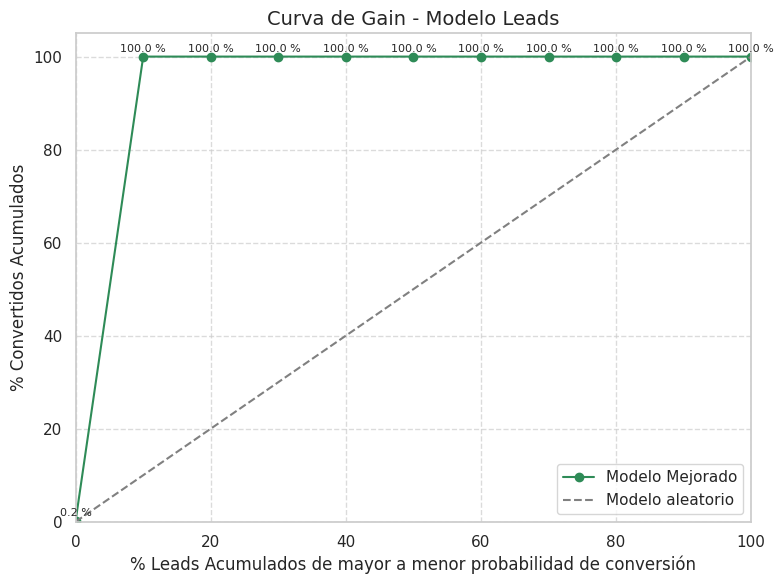

In [30]:
# Obtener las predicciones del mejor modelo en X_test
predictions_test = best_model_final.predict(X_test)

# Obtener las probabilidades de predicci√≥n (para la clase positiva, que es 1)
# Aseg√∫rate de que predict_proba devuelve las probabilidades en el orden de las clases
# La clase positiva suele ser la segunda columna (√≠ndice 1)
probabilities_test = best_model_final.predict_proba(X_test)[:, 1]

# Crear un DataFrame con las predicciones y las probabilidades
# Usamos el √≠ndice de X_test_raw para mantener el mapeo con el dataframe original si fuera necesario
resultados_test_df = pd.DataFrame({
    'Conversion_Predicha': predictions_test,
    'Probabilidad_Conversion': probabilities_test
}, index=X_test_raw.index) # Usamos el √≠ndice original para el mapeo

resultados_test_df['Conversion_Real'] = y_test

# Ordenamos el DataFrame por la probabilidad predicha en orden descendente
df_predictions = resultados_test_df.sort_values(by='Probabilidad_Conversion', ascending=False).reset_index(drop=True)


# Creamos columna con el % de usuarios acumulados
df_predictions['Usuario_Acumulado'] = (np.arange(len(df_predictions)) + 1) / len(df_predictions)

# Total de positivos reales
total_positivos = df_predictions['Conversion_Real'].sum()

# Columna con % acumulado de conversiones reales (modelo)
df_predictions['Convertidos_Acumulados'] = df_predictions['Conversion_Real'].cumsum() / total_positivos

# Punto de referencia: modelo aleatorio (l√≠nea diagonal)
df_predictions['Modelo_Aleatorio'] = df_predictions['Usuario_Acumulado']

# Reducimos la cantidad de puntos para graficar de forma ordenada
porcentajes = np.linspace(0, 1, 11)
indices = (porcentajes * len(df_predictions)).astype(int)
indices = np.clip(indices, 0, len(df_predictions)-1)
df_lift = df_predictions.iloc[indices].copy()

# Gr√°fico
plt.figure(figsize=(8,6))
plt.plot(df_lift['Usuario_Acumulado'] * 100, df_lift['Convertidos_Acumulados'] * 100,
         marker='o', label='Modelo Mejorado', color='seagreen')
plt.plot(df_lift['Usuario_Acumulado'] * 100, df_lift['Modelo_Aleatorio'] * 100,
         linestyle='--', label='Modelo aleatorio', color='gray')

# A√±adir etiquetas en los puntos
for i in range(len(df_lift)):
    x = df_lift['Usuario_Acumulado'].iloc[i] * 100
    y = df_lift['Convertidos_Acumulados'].iloc[i] * 100
    plt.text(x, y + 1, f"{y:.1f} %", ha='center', fontsize=8)

# Personalizaci√≥n del gr√°fico
plt.title('Curva de Gain - Modelo Leads', fontsize=14)
plt.xlabel('% Leads Acumulados de mayor a menor probabilidad de conversi√≥n')
plt.ylabel('% Convertidos Acumulados')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 105)
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

**C√°lculo del Lift en el Top 10%**

La f√≥rmula del **Lift** en el 10% de los leads con mayor probabilidad es:

$$
\text{Lift}_{10\%} = \frac{\text{Porcentaje de conversiones acumuladas en el 10% superior}}{\text{Porcentaje de conversi√≥n promedio}}
$$


El modelo logra concentrar 10 veces m√°s conversiones en el top 10% de leads que lo que se esperar√≠a si se eligieran al azar. Es un desempe√±o excelente, que demuestra una gran capacidad discriminativa del modelo optimizado.

**Interpretaci√≥n para el negocio:**


*   **Alta eficiencia comercial:** Puedes asignar tus recursos de ventas o marketing (como llamadas, emails, campa√±as personalizadas) solo al 10% m√°s prometedor de tu base de leads, y a√∫n as√≠ capturar el 100% de las ventas.

*   **Ahorro de costos:** En vez de contactar a todos los leads, puedes enfocarte en solo unos pocos y lograr el mismo resultado.

*   **Decisi√≥n informada:** Justifica el uso del modelo en estrategias de lead nurturing, remarketing o asignaci√≥n de agentes comerciales.

### 8. Evaluaci√≥n de variables que impactan a la conversi√≥n

In [31]:
from sklearn.inspection import permutation_importance

# Funci√≥n para evaluar la importancia de variables usando Permutation Importance
def evaluar_importancia_variables(modelo, X_test, y_test):
    resultado_importancia = permutation_importance(
        modelo, X_test, y_test, n_repeats=5, random_state=42, scoring='f1', n_jobs=-1
    )
    importancia_df = pd.DataFrame({
        'Variable': X_test.columns,
        'Importancia Media': resultado_importancia.importances_mean,
        'Desviaci√≥n Std': resultado_importancia.importances_std
    }).sort_values(by='Importancia Media', ascending=False)
    return importancia_df

In [32]:
# Evaluar importancia de variables del mejor modelo
importancia_df = evaluar_importancia_variables(best_model_final, pd.DataFrame(X_test, columns=selected_feature_names), y_test)

# Mostrar top 10 variables m√°s importantes
importancia_df.head(10)

Variable  Importancia Media  Desviaci√≥n Std
10           num__PagesViewed           0.537728        0.019403
11             num__EmailSent           0.362806        0.019791
8                    num__Age           0.305596        0.014855
2       cat__Location_Karachi           0.221451        0.008474
12        num__FollowUpEmails           0.215827        0.016677
1     cat__Location_Islamabad           0.194274        0.005467
3        cat__Location_Lahore           0.184189        0.010904
13  num__Submissions_per_view           0.045163        0.004447
0    cat__Location_Gujranwala           0.004583        0.002039
4      cat__Location_Peshawar           0.002505        0.001906

El an√°lisis de importancia de variables basado en permutation_importance nos permite identificar qu√© factores tienen mayor peso en la decisi√≥n de compra de los usuarios (leads) en Stuffmart.com. Este conocimiento es clave para redirigir esfuerzos de marketing y ventas de forma eficiente.

## üß† Insights estrat√©gicos para Stuffmart.com

### 1. üß≠ PagesViewed (p√°ginas vistas) como se√±al de intenci√≥n de compra
- **Es la variable m√°s determinante**: cuando el modelo pierde esta informaci√≥n, su capacidad de predicci√≥n cae dr√°sticamente.
- **Interpretaci√≥n**: cuanto m√°s interact√∫a un lead con el sitio web (explorando productos, categor√≠as, contenidos), mayor es su inter√©s genuino.
- **Acci√≥n recomendada**: priorizar leads con alta interacci√≥n en el sitio y activar remarketing personalizado. Tambi√©n es clave asegurar que las p√°ginas de producto carguen r√°pido, tengan buena UX y contenido atractivo.

### 2. üì¨ EmailSent y FollowUpEmails como impulsores de conversi√≥n
- El n√∫mero de correos enviados y los seguimientos realizados tambi√©n aparecen como variables muy influyentes.
- **Interpretaci√≥n**: una estrategia activa de nurturing por email tiene un impacto significativo en mover al lead por el funnel.
- **Acci√≥n recomendada**: dise√±ar secuencias automatizadas de emails que se adapten al comportamiento del usuario (p. ej., navegaci√≥n, abandono del carrito).

### 3. üë§ Edad del lead como factor relevante
- La edad muestra un efecto importante en la propensi√≥n a convertir.
- **Interpretaci√≥n**: posiblemente ciertos rangos etarios (ej. 25‚Äì40 a√±os) tienen mayor afinidad con los productos o canales de Stuffmart.com.
- **Acci√≥n recomendada**: realizar una segmentaci√≥n por grupos de edad y ajustar mensajes, ofertas y creatividades publicitarias a cada uno.

### 4. üó∫Ô∏è Ubicaci√≥n geogr√°fica (Karachi, Islamabad, Lahore)
- Estas ciudades aparecen como variables relevantes. Karachi, en particular, tiene un impacto significativo.
- **Interpretaci√≥n**: hay diferencias regionales en el comportamiento de compra y calidad de leads, posiblemente asociadas a infraestructura digital, h√°bitos o log√≠stica.
- **Acci√≥n recomendada**: geosegmentar campa√±as, reforzar presencia en ciudades de alta conversi√≥n y evaluar el desempe√±o de cada plaza en t√©rminos de ROI.

### 5. üìà Submissions per view (formularios por p√°gina visitada)
- Tiene una importancia media, lo que indica que la eficiencia del lead en interactuar con el sitio tambi√©n influye.
- **Acci√≥n recomendada**: mejorar el dise√±o y la visibilidad de formularios de contacto o descarga.

---

## ‚ùå Variables con poca o nula importancia

| Variable                   | Importancia Media |
|----------------------------|-------------------|
| `num__Emails_per_minute`   | 0.022             |
| `cat__Location_Rawalpindi` | 0.005             |

- Estas variables tienen un impacto marginal.
- **Interpretaci√≥n**: o bien no aportan valor real al modelo o podr√≠an estar mal calculadas (p. ej., "emails por minuto" podr√≠a ser un indicador mal escalado o poco interpretable).
- **Acci√≥n recomendada**: considerar su exclusi√≥n en futuros modelos, o redefinirlas con mejor criterio de negocio.

---

## üéØ Conclusi√≥n de negocio

El modelo ha revelado que **el comportamiento en el sitio web y el seguimiento por email son las principales palancas para mejorar la conversi√≥n**. Adem√°s, **la edad y la ubicaci√≥n geogr√°fica** permiten personalizar a√∫n m√°s la estrategia.

**Stuffmart.com puede aumentar significativamente su retorno de inversi√≥n si:**

- Prioriza leads con alto engagement web.
- Refuerza campa√±as de email marketing con automatizaci√≥n y personalizaci√≥n.
- Ajusta su comunicaci√≥n por edad y ciudad.
- Deja de invertir esfuerzos en se√±ales con poco poder predictivo.
